## Manter 30 principais classes e remover as imagens com os alimentos q aparecem pouco e ver se o dataset ainda tem mt imagem

In [3]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Pytorch: 1.7.1
Fastai: 2.2.7


In [4]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from torchvision.utils import save_image
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import PIL 
import os

In [5]:
#pathToDataSet = "/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/"
pathToDataSet = "../../dataset_v1/"
path_anno = pathToDataSet + 'gt/'
path_img = pathToDataSet + 'done/'
get_y_fn = lambda x : path_anno + f'{x.stem}_GT.png'


label_fnames = get_image_files(path_anno)
fnames = get_image_files(path_img)
print(len(fnames), len(label_fnames))



508 508


## Generate DataSet Histogram

In [6]:
totalArray = []

for i in range(0,len(fnames)):
    img = Image.open(get_y_fn(fnames[i]))
    arr = np.asarray(img)
    totalArray += list(np.unique(arr,return_counts=False))

print('Array Generated')


Array Generated


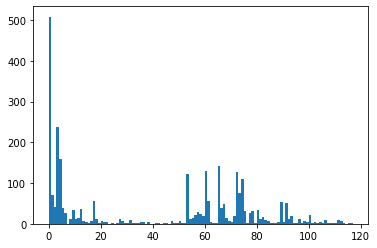

In [7]:
# histogram plot

codes = np.loadtxt( pathToDataSet + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[0] for code in codes] #pega apenas o ID de cada classe e ignora o nome

hist = plt.hist(totalArray, bins=len(codes), range=(0,len(codes)))
dicionario = {}


for code, contagem in zip(codes, hist[0]):
    dicionario[code] = int(contagem)

dicionario = {k: v for k, v in sorted(dicionario.items(), key=lambda item: item[1], reverse=True)} #sort



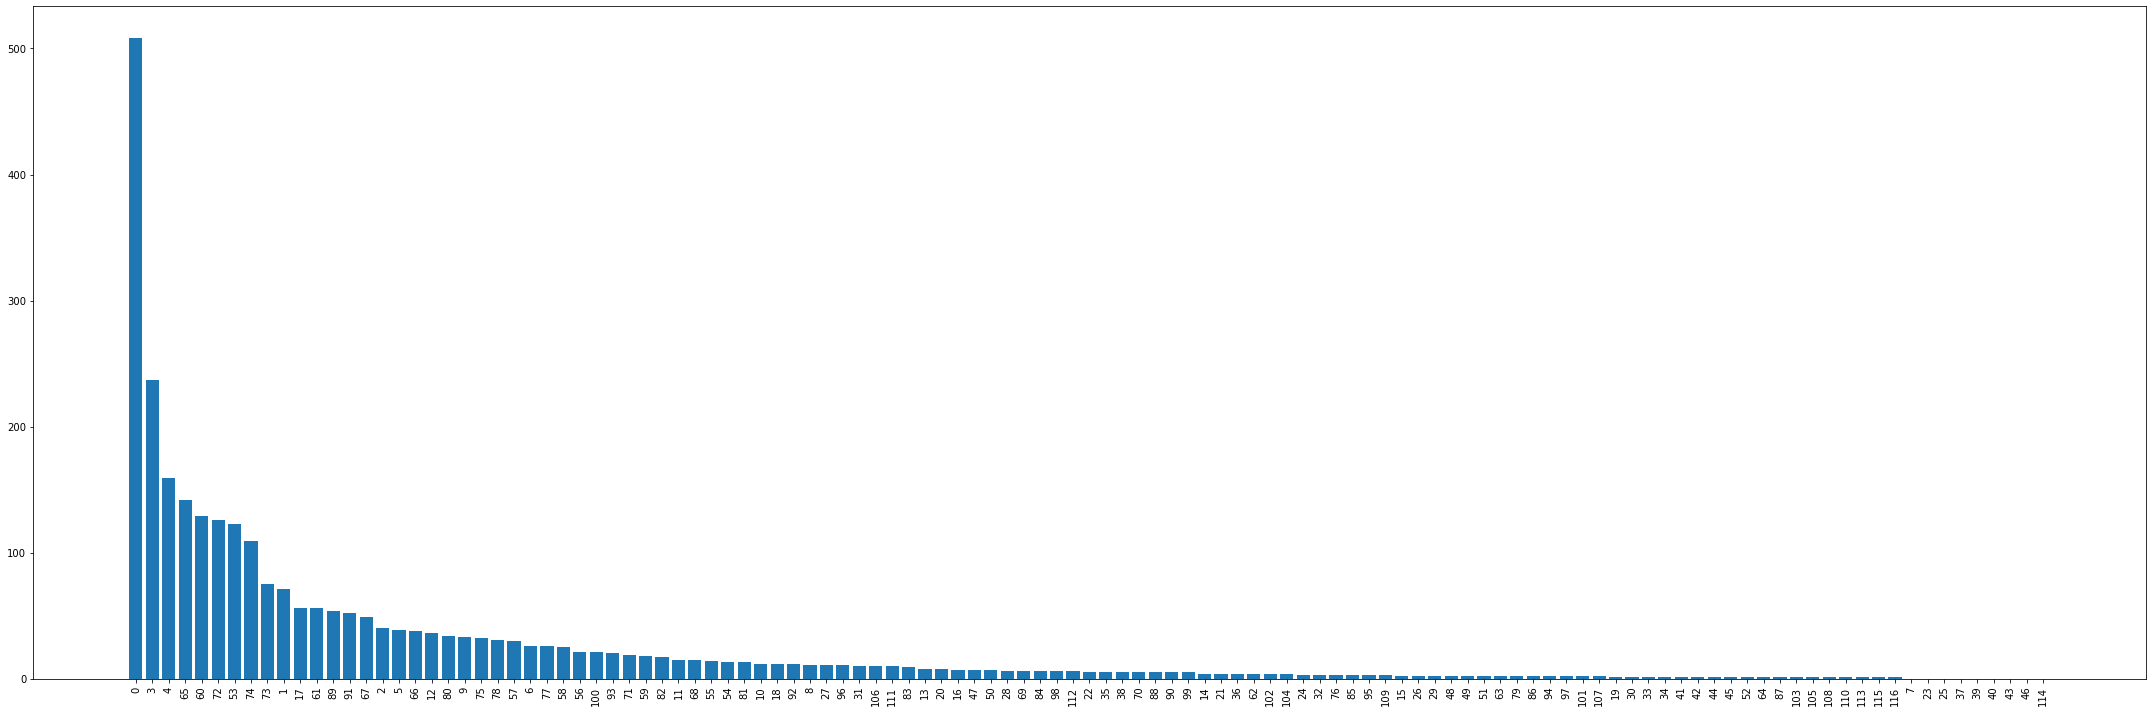

In [8]:
plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionario.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
print('Class that most appears >>> ', list(dicionario.items())[1][0])
print('Appears >>> ', list(dicionario.items())[1][1], ' times')

Class that most appears >>>  3
Appears >>>  237  times


## Remove classes that appear less than a threshold

In [10]:
# get all ground truth images and label ids of each sample

allGTs = []
idsInGTs = []
for idx in range(0,len(fnames)):
    img = Image.open(get_y_fn(fnames[idx]))
    arr = np.asarray(img)
    idsInGTs.append(list(np.unique(arr,return_counts=False)))
    allGTs.append(arr)


In [11]:
def getImagesByClass(classId):
    imagesWithClass = []
    imagesIdx = []

    for i in range(0, len(fnames)):
        arr = allGTs[i]
        idsInGT = idsInGTs[i]
        if int(classId) in idsInGT:
            imagesWithClass.append(fnames[i])
            imagesIdx.append(i)
            

    return imagesWithClass, imagesIdx

In [12]:
# check K main classes

k = 30 #26
print(str(k)+'th','position:', list(dicionario.items())[k])

minClassAppearances = list(dicionario.items())[k][1]
print('Appears >>> ', minClassAppearances, ' times')

30th position: ('71', 19)
Appears >>>  19  times


In [13]:
# remove all images that has less than X samples

idxsToRemove = []

for classId, classAppearances in dicionario.items():
    classImages, imagesIdx = getImagesByClass(classId)
    if classAppearances > 0 and len(imagesIdx) < minClassAppearances:
        idxsToRemove += imagesIdx
        #print(classId,classImages,imagesIdx)

# remove repeated idxs
idxsToRemove = list(set(idxsToRemove))

fnamesManySamplesPerClass = [fnames[i] for i in range(0,len(fnames)) if i not in idxsToRemove]
len(fnamesManySamplesPerClass)

231

## Check new dataset histogram

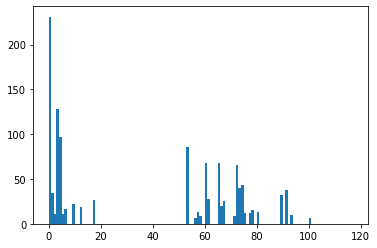

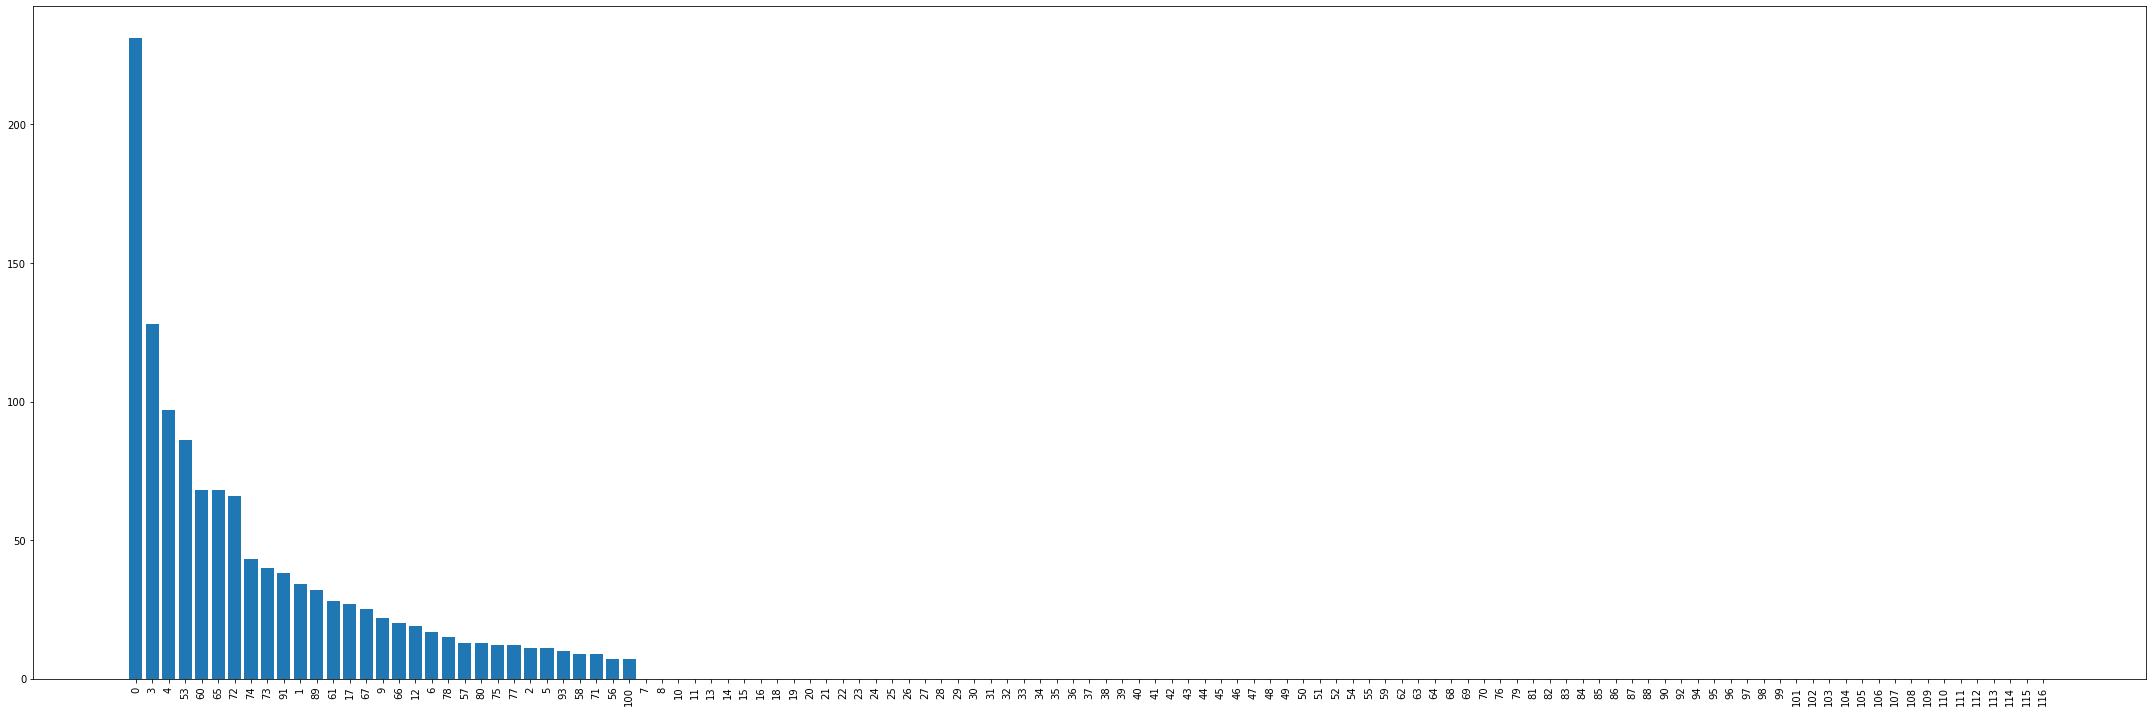

In [14]:
totalArray = []

for i in range(0,len(fnamesManySamplesPerClass)):
    img = Image.open(get_y_fn(fnamesManySamplesPerClass[i]))
    arr = np.asarray(img)
    totalArray += list(np.unique(arr,return_counts=False))

codes = np.loadtxt( pathToDataSet + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[0] for code in codes] 

hist = plt.hist(totalArray, bins=len(codes), range=(0,len(codes)))
dicionarioDataset = {}


for code, contagem in zip(codes, hist[0]):
    dicionarioDataset[code] = int(contagem)

dicionarioDataset = {k: v for k, v in sorted(dicionarioDataset.items(), key=lambda item: item[1], reverse=True)} #sort

plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionarioDataset.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
print(str(k)+'th','position:', list(dicionarioDataset.items())[k])


30th position: ('100', 7)


## Export new dataset

In [81]:
pathToSprintFolder = pathToDataSet + 'sprint4/'
pathToSprintFolderDone = pathToSprintFolder + 'done/'
pathToSprintFolderGT = pathToSprintFolder + 'gt/'

In [82]:
# create folder for new data

try: 
    os.mkdir(pathToSprintFolder)
    print('Created Sprint Folder')
except OSError as error:
    print(error)

try: 
    os.mkdir(pathToSprintFolderDone)
    print('Created Sprint Folder Done')
except OSError as error:
    print(error)

try: 
    os.mkdir(pathToSprintFolderGT)
    print('Created Sprint Folder GT')
except OSError as error:
    print(error)

[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: '../../dataset_v1/sprint4/'
[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: '../../dataset_v1/sprint4/done/'
[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: '../../dataset_v1/sprint4/gt/'


In [83]:
# copy new data and their gts to this sprint folder

from shutil import copyfile

for i in range(0, len(fnamesManySamplesPerClass)):
    copyfile(str(fnamesManySamplesPerClass[i]), pathToSprintFolderDone + fnamesManySamplesPerClass[i].name)
    copyfile(get_y_fn(fnamesManySamplesPerClass[i]), pathToSprintFolderGT + fnamesManySamplesPerClass[i].stem + "_GT.png")
    

## Export new classesNumber.txt

In [110]:
codes = np.loadtxt( pathToDataSet + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf') 
codesId = [code.split(": ")[0] for code in codes] 
codesName = [code.split(": ")[1] for code in codes] 

kFirstFoods = list(dicionarioDataset.items())[0:k+1]
newCodes = []

In [111]:
# take first k food codes

for food, cont in kFirstFoods:
    newCodes.append((codesName.index(food), food))
newCodesOrdered = [k for k in sorted(newCodes, key=lambda item: item[0], reverse=False)]
newCodesOrdered

[(0, 'NaoAlimento'),
 (1, 'AlimentoNaoRegistrado'),
 (2, 'Arroz Integral'),
 (3, 'Arroz Branco'),
 (4, 'Feijão'),
 (5, 'Arroz Integral e Feijao'),
 (6, 'Arroz Branco e Feijao'),
 (9, 'Batata'),
 (12, 'Pure de Batata'),
 (17, 'Farofa'),
 (53, 'Carne de Vaca'),
 (56, 'Linguiça'),
 (57, 'Carne moída'),
 (58, 'Peixe'),
 (60, 'Frango (sem osso)'),
 (61, 'Ovo'),
 (65, 'Alface'),
 (66, 'Alface com Tomate'),
 (67, 'Alface com Legumes'),
 (71, 'Tomate Cereja'),
 (72, 'Tomate'),
 (73, 'Brócolis'),
 (74, 'Cenoura'),
 (75, 'Abobrinha'),
 (77, 'Beterraba'),
 (78, 'Abóbora'),
 (80, 'Couve'),
 (89, 'Mix Vegetais'),
 (91, 'Batata Frita'),
 (93, 'Pepino'),
 (100, 'Banana da Terra')]

In [119]:
# create string from array and save to txt

newCodesString = ""
for id, food in newCodesOrdered:
    newCodesString += (str(id) + ": " + food + "\n")
newCodesString = newCodesString[:-1] #remove last end line

textfile = open("classesNumber.txt", "w", encoding="utf-8")
textfile.write(newCodesString)
textfile.close()